In [70]:
import numpy
import matplotlib.pyplot
import os
import scipy.interpolate
import convolveLN
import importlib
importlib.reload(convolveLN)
import propagateErrorLN
importlib.reload(propagateErrorLN)


<module 'propagateErrorLN' from '/home/studen/software/src/PBPK/pythonScripts/propagateErrorLN.py'>

qa=[ 0.003  -0.0035]
[0] mean=0.003 std=0.0012 cv=0.40
[1] mean=-0.0035 std=0.0014 cv=-0.40
[x] mean=0.01 std=0.0018 cv=0.18
qa=[ 0.003  -0.0035]
A=0.003,0.0035
cvPrime=[0.4 0.4]
sigmaS=[0.38525317 0.38525317]
muS=[-0.07421 -0.07421]
Reading for sigma=0.38525317015992666
Reading for sigma=0.38525317015992666
B=0.0105
mean/target= 1;1.1 fInt=1.00 hInt/fInt=1.00


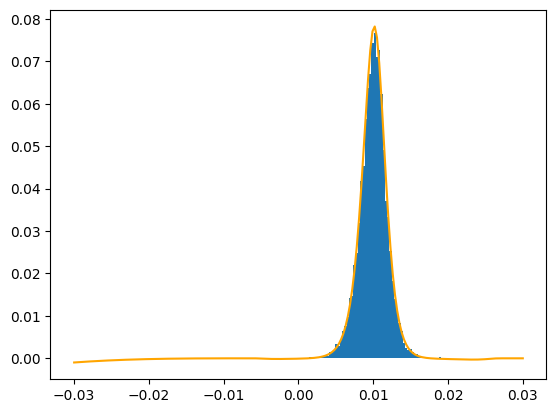

In [83]:
muTarget=0.01
cv=numpy.array([0.4,0.4])
mu0=numpy.array([1.0,1.0])
dydx=numpy.array([0.003,-0.0035])
fmax=0.03
nb=100
fx=numpy.linspace(-fmax,fmax,2*nb+1)
h=propagateErrorLN.generateDistribution(fx,muTarget,mu0,cv,dydx,1)
y=propagateErrorLN.calculateDistribution(fx,muTarget,mu0,cv,dydx)
h0=numpy.sum(fx*h)/numpy.sum(h)
y0=numpy.sum(fx*y)/numpy.sum(y)

q=numpy.array([h0,y0])
if muTarget!=0:
    q/=muTarget

    
print('mean/target={:2.2g};{:2.2g} fInt={:.2f} hInt/fInt={:.2f}'.format(q[0],q[1],
                                                               numpy.sum(y),numpy.sum(h)/numpy.sum(y)))
matplotlib.pyplot.bar(fx,h,fmax/nb)
matplotlib.pyplot.plot(fx,y,color='orange')


In [80]:
n=2000
qz,fa,u0,h=convolveLN.getZArray(n)
cv=numpy.array([0.3,0.3])
mu=numpy.array([1.5,1])
sigma=numpy.sqrt(numpy.log(1+cv*cv))
muS=numpy.log(mu/numpy.sqrt(1+cv*cv))
print(sigma)
#q1=convolveLN.getComplexConjugatedLTransformAtMinusComplexConjugatedZGrid(0.3,qz)
q1=convolveLN.getLTransformGrid(sigma[0],qz,muS[0])
q2=convolveLN.getComplexConjugatedLTransformAtMinusComplexConjugatedZGrid(0.1,qz,muS[1])
q3=convolveLN.getLTransformGrid(sigma[1],qz,muS[1])
fmax=5
nb=100
fx=numpy.linspace(0,fmax,nb+1)
print(q1)
print(q2)
fy=convolveLN.inverseL(fx,qz,q1*q3,fa,u0,h,n)

[0.29356038 0.29356038]
[2.43987137e-01+0.00000000e+00j 2.45110495e-01-2.44527012e-02j
 2.43590371e-01-4.91260136e-02j ... 7.57700368e-27-5.41816969e-27j
 7.50087710e-27-5.40592089e-27j 7.42537332e-27-5.39348347e-27j]
[2.63090977e+00-0.00000000e+00j 2.60495558e+00+1.89292222e-01j
 2.56550644e+00+3.74802156e-01j ... 2.68359363e-44+1.71020205e-44j
 2.59169038e-44+1.72201602e-44j 2.50163352e-44+1.73184640e-44j]


61.91493950447091

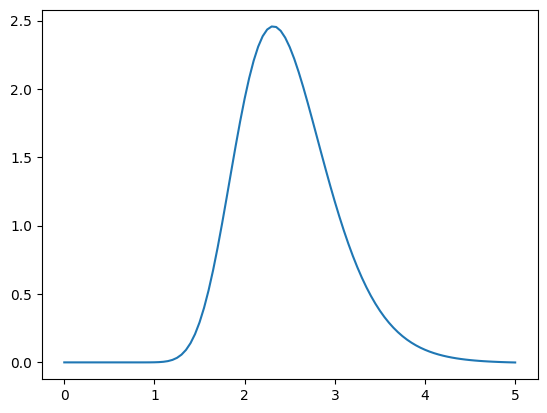

In [81]:
matplotlib.pyplot.plot(fx,fy)
numpy.sum(fy)